**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/parsing-dates).**

---


In this exercise, you'll apply what you learned in the **Parsing dates** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [4]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
# TODO: Your code here!
earthquakes.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

Once you have answered the question above, run the code cell below to get credit for your work.

In [10]:
# Check your answer (Run this code cell to receive credit!)
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The "Date" column in the `earthquakes` DataFrame does have dates.  The dtype is "object".

In [ ]:
# Line below will give you a hint
#q1.hint()

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [11]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [12]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [29]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices,'Date']

Indices with corrupted data: [ 3378  7512 20650]


3378                   02/23/1975
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [31]:
# manually edit the format of these 3 rows  [ 3378  7512 20650]
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes.loc[indices,'Date']

3378     02/23/1975
7512     04/28/1985
20650    03/13/2011
Name: Date, dtype: object

Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [33]:
# TODO: Your code here
earthquakes['date_parsed']= pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")
# Check your answer
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [20]:
# Lines below will give you a hint or solution code
# q2.hint()
# q2.solution()
# Solution:

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [34]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

# Check your answer
q3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#q3.hint()
#q3.solution()

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

<AxesSubplot:xlabel='date_parsed'>

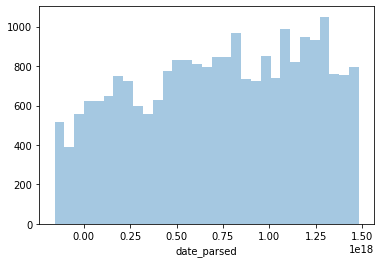

In [36]:
# TODO: Your code here!
# remove na's
day_of_month = earthquakes['date_parsed'].dropna()

# plot the day of the month
sns.distplot(day_of_month, kde=False, bins=31)

Does the graph make sense to you?

In [37]:
# Check your answer (Run this code cell to receive credit!)
q4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The graph should make sense: it shows a relatively even distribution in days of the month,which is what we would expect.

In [38]:
# Line below will give you a hint
#q4.hint()

# (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years 

Run the next code cell to load the data.

In [39]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [52]:
volcanos['Last Known Eruption'].sample(25)

491      Unknown
439      Unknown
916      1992 CE
1270     Unknown
861      220 BCE
616      1888 CE
1499     2015 CE
1496     1975 CE
301      2008 CE
367      2016 CE
1080     Unknown
857      Unknown
8        1944 CE
541      Unknown
66       Unknown
309      2014 CE
366      1881 CE
789      1952 CE
1316     Unknown
168      Unknown
1195     Unknown
269      2009 CE
1283     Unknown
148     8050 BCE
96       Unknown
Name: Last Known Eruption, dtype: object